<a href="https://colab.research.google.com/github/Vlad-Shapar/machine-learning/blob/main/%D0%A8%D0%B0%D0%BF%D0%B0%D1%80%D1%8C_%D0%BF%D1%80_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Завдання 1. Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Виведемо перші 5 рядків
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


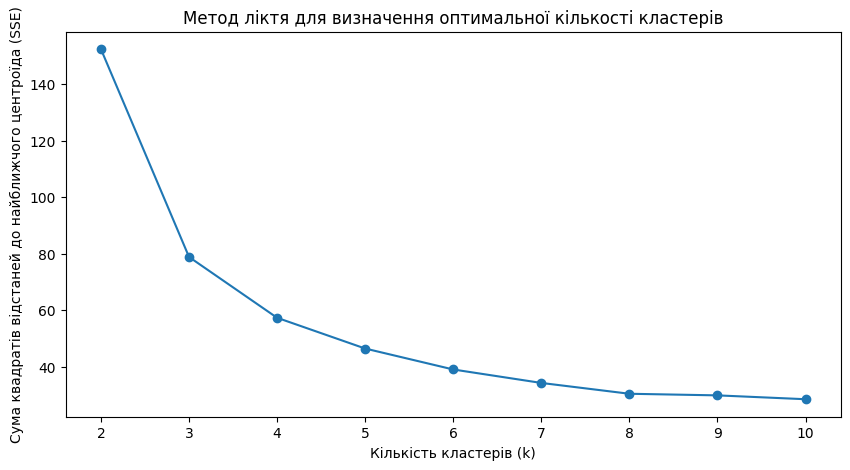

In [ ]:
''' Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів'''
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10,5))
plt.plot(k_range, sse, marker='o')
plt.title("Метод ліктя для визначення оптимальної кількості кластерів")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Сума квадратів відстаней до найближчого центроїда (SSE)")
plt.show()

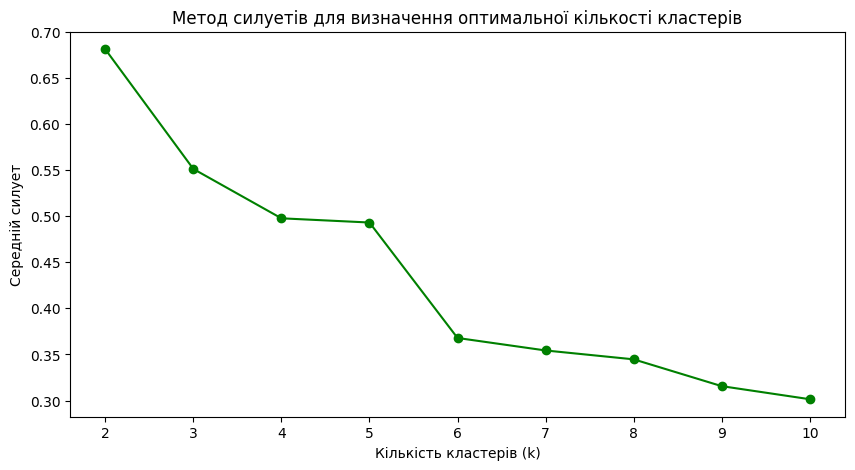

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Метод силуетів для визначення оптимальної кількості кластерів")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Середній силует")
plt.show()

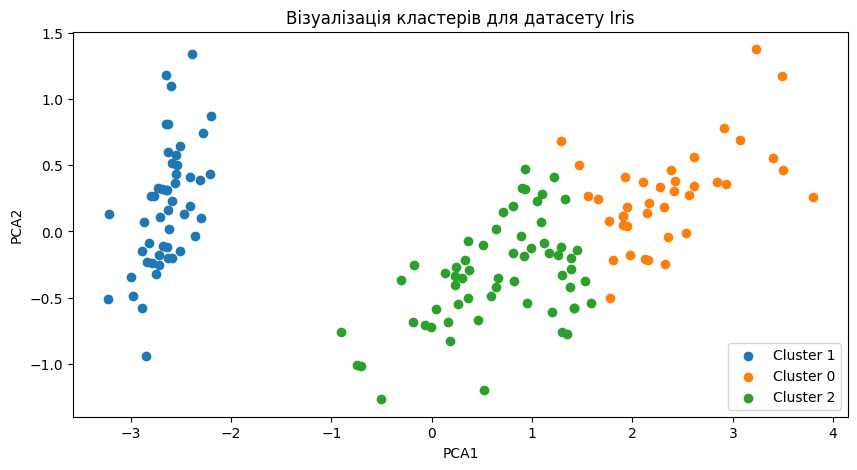

In [ ]:
'''Візуалізувати кластери.'''
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df.iloc[:, :-1]), columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(10,5))
for cluster in df_pca['Cluster'].unique():
    clustered_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(clustered_data['PCA1'], clustered_data['PCA2'], label=f'Cluster {cluster}')

plt.title("Візуалізація кластерів для датасету Iris")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

In [ ]:
'''
Аналіз датасету "Ірис" з використанням методів кластеризації виявив, що
оптимальна кількість кластерів становить три. Це було підтверджено методом
ліктя, який показав різке зменшення суми квадратів відстаней після трьох
кластерів, та методом силуетів, де максимальний середній коефіцієнт силуета
спостерігався при трьох кластерах. Візуалізація даних за допомогою методу PCA
також продемонструвала чітке розділення на три групи, що відповідає трьом
відомим видам ірису. Ці результати підкреслюють ефективність кластеризації та
можливість її застосування для схожих задач у майбутньому.
'''

In [ ]:
'''Завдання 2.
Завантажити датасет
Реалізувати попередній аналіз даних:
Роздрукувати перші 5 рядків.'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import os
file_path = '/content/drive/My Drive/Student_data.csv'
df = pd.read_csv(file_path)

df.head(5)


Mounted at /content/drive


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
'''Вивести розмір датасета, типи даних.
Перевірити на пропущені значення. При наявності замінити на середнє за
стовпцем. Перевірити на дублікати. Якщо є – видалити. Вивести описову статистику.'''

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score

print(df.shape)
print(df.info())

missing_values = df.isnull().sum()
print("Пропущені значення:\n", missing_values)

df.fillna(df.mean(), inplace=True)

duplicates = df.duplicated().sum()
print("Кількість дублікатів:", duplicates)

df.drop_duplicates(inplace=True)

print(df.describe())

(2392, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None
Пропущен

In [ ]:
'''Вирішуємо задачу класифікації. '''
from sklearn.preprocessing import StandardScaler

X = df.drop(['GradeClass', 'StudentID'], axis=1)
y = df['GradeClass']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
'''Побудувати 3 моделі на вибір для визначення оцінки. Підібрати оптимальні параметри.
Оцінити моделі.'''
# Модель Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Найкращі параметри Random Forest:", grid_rf.best_params_)
print("Точність Random Forest:", grid_rf.score(X_test, y_test))


Найкращі параметри Random Forest: {'max_depth': 10, 'n_estimators': 100}
Точність Random Forest: 0.9122562674094707


In [ ]:
# Модель Логістичної регресії

from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
}

lr = LogisticRegression(random_state=42)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Найкращі параметри Logistic Regression:", grid_lr.best_params_)
print("Точність Logistic Regression:", grid_lr.score(X_test, y_test))

Найкращі параметри Logistic Regression: {'C': 10, 'penalty': 'l2'}
Точність Logistic Regression: 0.7520891364902507


In [ ]:
# Модель SVM

from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

svm = SVC(random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Найкращі параметри SVM:", grid_svm.best_params_)
print("Точність SVM:", grid_svm.score(X_test, y_test))


Найкращі параметри SVM: {'C': 10, 'kernel': 'linear'}
Точність SVM: 0.8467966573816156


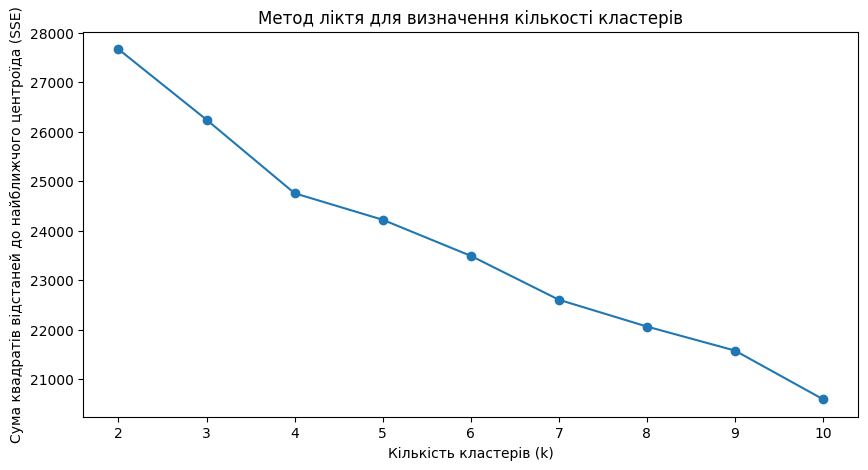

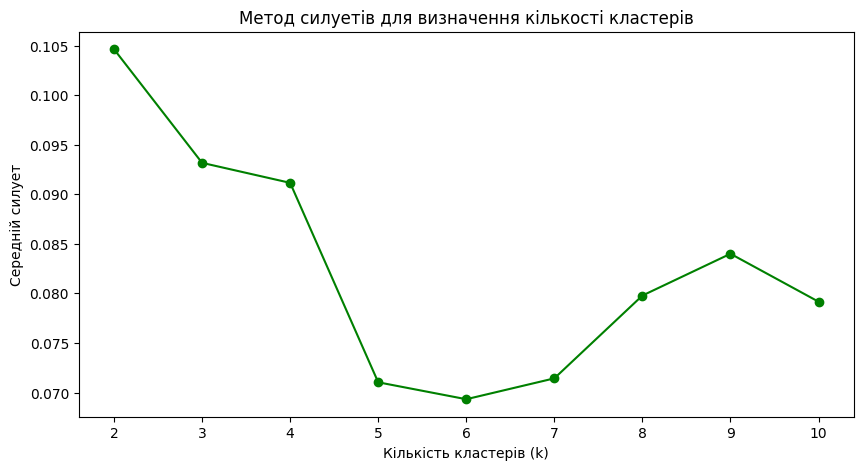

In [ ]:
'''Визначити методом ліктя і силуєтів оптимальну кількість кластерів.'''

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10,5))
plt.plot(k_range, sse, marker='o')
plt.title("Метод ліктя для визначення кількості кластерів")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Сума квадратів відстаней до найближчого центроїда (SSE)")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Метод силуетів для визначення кількості кластерів")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Середній силует")
plt.show()


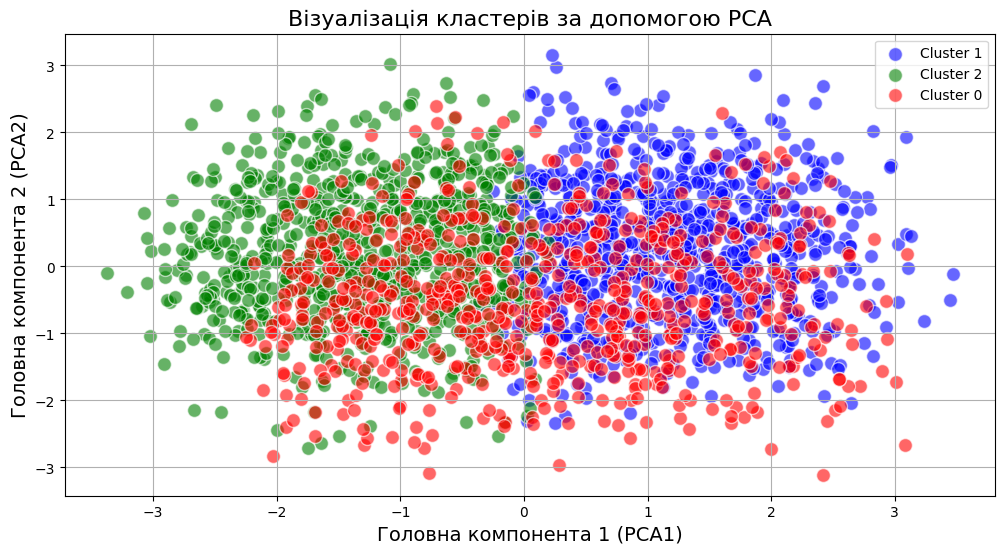

In [ ]:
'''Візуалізувати кластери.'''
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(12, 6))
colors = ['red', 'blue', 'green']

for cluster in df_pca['Cluster'].unique():
    clustered_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(clustered_data['PCA1'], clustered_data['PCA2'],
                label=f'Cluster {cluster}', alpha=0.6, edgecolors='w', s=100, color=colors[cluster])

plt.title("Візуалізація кластерів за допомогою PCA", fontsize=16)
plt.xlabel("Головна компонента 1 (PCA1)", fontsize=14)
plt.ylabel("Головна компонента 2 (PCA2)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
'''
Random Forest досягла найвищої точності серед трьох моделей, склавши 91.23%.
Оптимальні параметри для цієї моделі: глибина дерев (max_depth) = 10 та
кількість дерев у лісі (n_estimators) = 100. Це свідчить про її високу
ефективність у розв'язанні задачі класифікації на даних.

Логістична регресія показала точність 75.21%, використовуючи параметри
регуляризації C = 10 і штраф l2. Ця модель демонструє гірші результати,
оскільки може бути менш адаптованою до складних патернів у даних.

SVM (Support Vector Machine) з лінійним ядром показала точність 84.68%, що є
середнім показником. Оптимальний параметр регуляризації C = 10, а ядро було
обрано лінійним. Це свідчить про те, що SVM може бути достатньо ефективною для
даної задачі класифікації, проте поступається Random Forest.'''